# Amazon Review Data 활용하기
1. 데이터셋 버전
  - 2013 버전([링크](http://snap.stanford.edu/data/web-Amazon-links.html))
  - 2014 버전([링크](https://jmcauley.ucsd.edu/data/amazon/))
  - 2018 버전([링크](https://nijianmo.github.io/amazon/index.html))
2. 2018버전 데이터셋 정보
  - reviews(ratings, text, helpfulness votes)
  - product metadata(descriptions, category information, price band and image features)
  - links(also viewed/also bought graphs)
  - 이외 추가 정보는 웹사이트 참고
  - 최근(2020-08-07)까지 업데이트된 내용이 있다
3. 데이터셋 크기가 매우 크기 때문에, `Complete review data`보다 `Small subsets 데이터`를 먼저 사용하는 것을 추천한다


In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [4]:
### load the meta data
data = []
path = '../data/'
with gzip.open(path + 'meta_Computers.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

18772
{'description': ['Brand new. Still in factory-sealed plastic.'], 'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby', 'image': ['https://images-na.ssl-images-amazon.com/images/I/31IlLImCVJL._SS40_.jpg'], 'brand': 'Kelby Training', 'rank': ['>#654,681 in Electronics (See Top 100 in Electronics)'], 'main_cat': 'Computers', 'date': 'December 2, 2011', 'asin': '0321732960'}


In [5]:
# convert list into pandas dataframe
df = pd.DataFrame.from_dict(data)
print(len(df))

18772


In [7]:
df.head()

,description,title,image,brand,rank,main_cat,date,asin,feature,tech1,also_buy,price,also_view,tech2,details,similar_item
0,[Brand new. Still in factory-sealed plastic.],Kelby Training DVD: The Adobe Photoshop CS5 7-...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#654,681 in Electronics (See Top 100 in Elec...",Computers,"December 2, 2011",0321732960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[If you're already a Photoshop user and want a...,Kelby Training DVD: Adobe Photoshop CS5 Power ...,[https://images-na.ssl-images-amazon.com/image...,Kelby Training,"[>#830,165 in Electronics (See Top 100 in Elec...",Computers,"November 7, 2011",0321735722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[School To Home Notes: Note From the Teacher!\...,TEACHERS FRIEND NOTE FROM THE TEACHER SCHOOL T...,[https://images-na.ssl-images-amazon.com/image...,TEACHERS FRIEND,"[>#1,233,887 in Electronics (See Top 100 in El...",Computers,"June 6, 2007",0439651859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Dooqi is a young brand specializing in high-e...,"[3-pack]Ipad Mini Screen Protector, Dooqi Scre...",[https://images-na.ssl-images-amazon.com/image...,dooqi,"[>#454,595 in Electronics (See Top 100 in Elec...",Computers,"December 5, 2014",0545729971,"[Hard coated for Scratch Proof (Hardness: 4H),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[Cover for Nook HD],Hd+ Cheetah Cover- Nook,NaN,Nook,"[>#85,661 in Computers & Accessories (See top ...",Computers,"September 11, 2013",0594450284,[Cheetah cover],"{'Brand Name': 'Nook', 'Item Weight': '1 pound...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
### remove rows with unformatted title (i.e. some 'title' may still contain html style content)
df3 = df.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

135
18637


In [9]:
# how those unformatted rows look like
df4.iloc[0]

description                                                      
title           var aPageStart = (new Date()).getTime();\nvar ...
image                                                            
brand                                              DS Miller Inc.
rank            [>#1,826,312 in Electronics (See Top 100 in El...
main_cat                                                Computers
date                                                March 1, 2010
asin                                                   B0016C5EXY
feature                                                          
tech1                                                            
also_buy                                                         
price                                                            
also_view                                                        
tech2                                                            
details                                                          
similar_it

In [14]:
import os, json
import pandas as pd

In [15]:
path = '../data/amazon_reviews/'

In [24]:
ratings_df = pd.read_csv(os.path.join(path, 'Software.csv'), header=None, names=['item','user','rating','timestamp'], encoding='utf-8')

In [25]:
ratings_df.head()

,item,user,rating,timestamp
0,0077613252,A240ORQ2LF9LUI,4.0,1394496000
1,0077613252,A1YCCU0YRLS0FE,4.0,1393113600
2,0077613252,A1BJHRQDYVAY2J,1.0,1392595200
3,0077613252,APRDVZ6QBIQXT,3.0,1392595200
4,0077775473,A2JZTTBSLS1QXV,5.0,1381708800


In [32]:
print(ratings_df.shape)
print(ratings_df.head())

(459436, 4)
         item            user  rating   timestamp
0  0077613252  A240ORQ2LF9LUI     4.0  1394496000
1  0077613252  A1YCCU0YRLS0FE     4.0  1393113600
2  0077613252  A1BJHRQDYVAY2J     1.0  1392595200
3  0077613252   APRDVZ6QBIQXT     3.0  1392595200
4  0077775473  A2JZTTBSLS1QXV     5.0  1381708800


In [27]:
data = []
with open(os.path.join(path, 'Software_5.json'), 'r', encoding='utf-8') as f:
    for l in f:
        data.append(json.loads(l.strip()))

In [28]:
all_df = pd.DataFrame.from_dict(data)
print(all_df.shape)
print(all_df.columns)

(12805, 12)
Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [33]:
all_df = all_df[['reviewerID', 'asin', 'vote', 'reviewText', 'overall']]
all_df.head()

,reviewerID,asin,vote,reviewText,overall
0,A38NELQT98S4H8,0321719816,NaN,I've been using Dreamweaver (and it's predeces...,4.0
1,A3QJU4FEN8PQSZ,0321719816,NaN,"The demo is done with the PC version, with ref...",4.0
2,ACJT8MUC0LRF0,0321719816,3,If you've been wanting to learn how to create ...,5.0
3,AYUF7YETYOLNX,0321719816,NaN,I've been creating websites with Dreamweaver f...,5.0
4,A31ICLWQ9CSHRS,0321719816,NaN,I decided (after trying a number of other prod...,5.0


In [34]:
# number of unique reviewers
print(len(all_df['reviewerID'].unique()))
# number of unique items
print(len(all_df['asin'].unique()))

1826
802


In [35]:
reviewer_info_df = pd.concat([all_df.groupby(by='reviewerID')['asin'].count(), 
                              all_df.groupby(by='reviewerID')['overall'].mean()], axis=1)
reviewer_info_df.columns = ['number_of_items','average_ratings']
print(reviewer_info_df.head())
print(reviewer_info_df.shape)

                number_of_items  average_ratings
reviewerID                                      
A100UD67AHFODS                5         4.800000
A105S56ODHGJEK               29         3.689655
A1075X1Q4M3S78                5         5.000000
A10C5CJK1YKGV0               10         4.100000
A10CRW7XRJBJ2G                5         3.200000
(1826, 2)


array([[<AxesSubplot:title={'center':'number_of_items'}>,
        <AxesSubplot:title={'center':'average_ratings'}>]], dtype=object)

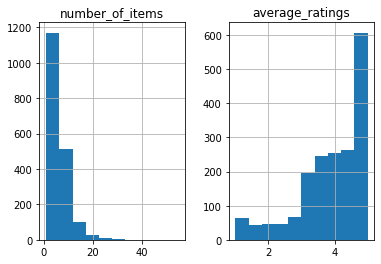

In [36]:
# review를 쓴 평균 item 수, item의 평균 평점
reviewer_info_df.hist()

## Preprocess text data

In [37]:
import re

In [38]:
removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●,  , ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, .,?, !,【,】, …, ◆,%"

def preprocess_sent(sentence):
    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()

    return sentence

In [39]:
all_df = all_df[['reviewText','overall']]
all_df.dropna(how='any', inplace=True)
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: preprocess_sent(str(x).replace('\t',' ').replace('\n',' ')))
all_df['reviewText'] = all_df['reviewText'].apply(lambda x: ' '.join(x.split(' ')[:30])) # 빠른 학습 위해서 글자 30개로 잘라버림

print(all_df.shape)

(12804, 2)


In [40]:
all_df['num_lengths'] = all_df['reviewText'].apply(lambda x: len(x.split(' ')))
all_df = all_df[all_df.num_lengths > 10] # 글자 10 이상만 취함


In [41]:
all_df.drop('num_lengths', axis=1, inplace=True)
print(all_df.shape)
all_df.to_csv(os.path.join(path, 'Software_reviewText.csv'), sep='\t', encoding='utf-8')

(11273, 2)


In [42]:
all_df['reviewText'].iloc[0]

'Ive been using Dreamweaver and its predecessor Macromedias UltraDev for many years For someone who is an experienced web designer this course is a high level review of the CS5'

In [43]:
all_df['overall'].iloc[0]

4.0

## Load dataset

In [44]:
import torch
from torchtext import data
from torchtext import datasets
import random

SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField()

/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [45]:
fields = [(None, None), ('text', TEXT), ('label', LABEL)]

# Load Custom dataset
training_data = data.TabularDataset(path=os.path.join(path,'Software_reviewText.csv'),
                                  format ='tsv', fields = fields, skip_header = True)

# Print sample text
print(vars(training_data.examples[0]))

/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)


{'text': ['I', 've', 'been', 'using', 'Dreamweaver', 'and', 'its', 'predecessor', 'Macromedias', 'UltraDev', 'for', 'many', 'years', 'For', 'someone', 'who', 'is', 'an', 'experienced', 'web', 'designer', 'this', 'course', 'is', 'a', 'high', 'level', 'review', 'of', 'the', 'CS5'], 'label': '4.0'}


In [46]:
MAX_VOCAB_SIZE = 25000

# Pre-trained embedding을 사용하고자 한다면 아래를 실행하자
# TEXT.build_vocab(train_data, 
#                  max_size = MAX_VOCAB_SIZE, 
#                  vectors = "glove.6B.100d", 
#                  unk_init = torch.Tensor.normal_)

TEXT.build_vocab(training_data, 
                 max_size = MAX_VOCAB_SIZE)

LABEL.build_vocab(training_data)

In [47]:
print(LABEL.vocab.stoi)

defaultdict(None, {'5.0': 0, '4.0': 1, '3.0': 2, '1.0': 3, '2.0': 4})


In [48]:
print(TEXT.vocab.stoi)

defaultdict(<bound method Vocab._default_unk_index of <torchtext.vocab.Vocab object at 0x11a046e10>>, {'<unk>': 0, '<pad>': 1, 'I': 2, 'the': 3, 'to': 4, 'and': 5, 'a': 6, 'is': 7, 'it': 8, 'of': 9, 'for': 10, 'this': 11, 'have': 12, 'with': 13, 'that': 14, 'my': 15, 'on': 16, 'in': 17, 'you': 18, 'was': 19, 'software': 20, 'not': 21, 'but': 22, 'This': 23, 'nt': 24, 'years': 25, 'product': 26, 'The': 27, 'as': 28, 'used': 29, 'been': 30, 'It': 31, 'use': 32, 'version': 33, 've': 34, 'has': 35, 'do': 36, 'had': 37, 'using': 38, 'are': 39, 'be': 40, 'program': 41, 'Windows': 42, 'from': 43, 'an': 44, 'all': 45, 'so': 46, 'very': 47, 'like': 48, 'Norton': 49, 'one': 50, 'can': 51, 'computer': 52, 'or': 53, 'easy': 54, 'good': 55, 'me': 56, 'year': 57, 'its': 58, 'your': 59, 'up': 60, 'more': 61, 'great': 62, 'time': 63, 'does': 64, 'at': 65, 'just': 66, 'than': 67, 'about': 68, 'no': 69, 'new': 70, 'many': 71, 'am': 72, 'some': 73, 'out': 74, 'well': 75, 'Office': 76, 'will': 77, 'get': 

In [49]:
BATCH_SIZE = 64

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_data, valid_data = training_data.split(split_ratio=0.8, random_state = random.seed(1234))

train_iterator, valid_iterator = data.BucketIterator.splits(
    (train_data, valid_data), 
    sort_key = lambda x: len(x.text),
    sort_within_batch=False,
    batch_size = BATCH_SIZE
    )

/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [50]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        text = text.permute(1, 0)

        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [51]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 100
FILTER_SIZES = [2,3,4]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [52]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,389,505 trainable parameters


In [53]:
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [54]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# model = model.to(device)
# criterion = criterion.to(device)

In [55]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [56]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.text)
        
        loss = criterion(predictions, batch.label)
        
        acc = categorical_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [57]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text)
            
            loss = criterion(predictions, batch.label)
            
            acc = categorical_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [58]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [59]:
N_EPOCHS = 10

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'cnn-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

/Users/ohyeji/anaconda3/envs/torch/lib/python3.7/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Epoch Time: 0m 9s
	Train Loss: 1.502 | Train Acc: 38.91%
	 Val. Loss: 1.337 |  Val. Acc: 43.71%
Epoch: 02 | Epoch Time: 0m 9s
	Train Loss: 1.336 | Train Acc: 45.35%
	 Val. Loss: 1.304 |  Val. Acc: 43.35%
Epoch: 03 | Epoch Time: 0m 9s
	Train Loss: 1.270 | Train Acc: 47.99%
	 Val. Loss: 1.292 |  Val. Acc: 44.92%
Epoch: 04 | Epoch Time: 0m 9s
	Train Loss: 1.193 | Train Acc: 51.16%
	 Val. Loss: 1.237 |  Val. Acc: 46.88%
Epoch: 05 | Epoch Time: 0m 9s
	Train Loss: 1.133 | Train Acc: 54.14%
	 Val. Loss: 1.226 |  Val. Acc: 48.09%
Epoch: 06 | Epoch Time: 0m 9s
	Train Loss: 1.065 | Train Acc: 57.51%
	 Val. Loss: 1.209 |  Val. Acc: 49.48%
Epoch: 07 | Epoch Time: 0m 9s
	Train Loss: 0.997 | Train Acc: 60.20%
	 Val. Loss: 1.174 |  Val. Acc: 51.29%
Epoch: 08 | Epoch Time: 0m 9s
	Train Loss: 0.924 | Train Acc: 63.58%
	 Val. Loss: 1.169 |  Val. Acc: 51.44%
Epoch: 09 | Epoch Time: 0m 9s
	Train Loss: 0.833 | Train Acc: 67.58%
	 Val. Loss: 1.187 |  Val. Acc: 50.78%
Epoch: 10 | Epoch Time: 0m 9

## Evaluate model

In [60]:
model.load_state_dict(torch.load('cnn-model.pt'))

import spacy
nlp = spacy.load('en')

def predict_class(model, sentence, min_len = 4):
    model.eval()
    tokenized = [tok.text for tok in nlp.tokenizer(sentence)]
    if len(tokenized) < min_len:
        tokenized += ['<pad>'] * (min_len - len(tokenized))
    indexed = [TEXT.vocab.stoi[t] for t in tokenized]
    tensor = torch.LongTensor(indexed)
    tensor = tensor.unsqueeze(1)
    preds = model(tensor)
    max_preds = preds.argmax(dim = 1)
    return max_preds.item()

In [61]:
pred_class = predict_class(model, "best item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


In [62]:
pred_class = predict_class(model, "worst item")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 3 = 1.0


In [63]:
pred_class = predict_class(model, "it was best item, but requires to be fixed")
print(f'Predicted class is: {pred_class} = {LABEL.vocab.itos[pred_class]}')

Predicted class is: 0 = 5.0


## (참고) BERT Embedding 가져오기
1. word2vec
2. [fastText](https://fasttext.cc/)
3. [Glove](https://nlp.stanford.edu/projects/glove/)
4. Huggingface 참고([링크](https://huggingface.co/transformers/pretrained_models.html))


In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/ohyeji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
import re
import warnings

import numpy as np
import torch
from nltk import tokenize
from transformers import BertModel, BertTokenizer

warnings.filterwarnings("ignore")

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_embedding(sentence):
    sent_vectors = []
    for sent in tokenize.sent_tokenize(sentence):
        text = "[CLS] " + sent + " [SEP]"
        tokenized_text = tokenizer.tokenize(text)
        indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
        segments_ids = [1] * len(tokenized_text)

        tokens_tensor = torch.tensor([indexed_tokens])
        segments_tensor = torch.tensor([segments_ids])

        with torch.no_grad():
            outputs = model(tokens_tensor, segments_tensor)
            encoded_layers = outputs[0] # last hidden state          
            sentence_embedding = torch.mean(encoded_layers[0], dim=0)
            sent_vectors.append(sentence_embedding.detach().numpy())

    return np.array(sent_vectors).mean(axis=0)


In [66]:
bert_embedding = get_embedding('hello, today is thursday')

In [67]:
len(bert_embedding)

768